In [1]:
import re
import nb_utils

dir = nb_utils.outdir / 'task1/random'
log = dir.joinpath('std_log.txt').read_text()
times = {
	match.group(1): float(match.group(2))
	for match in re.finditer(r'(model_\d+)/pds: ([\d\.]+)', log)
}

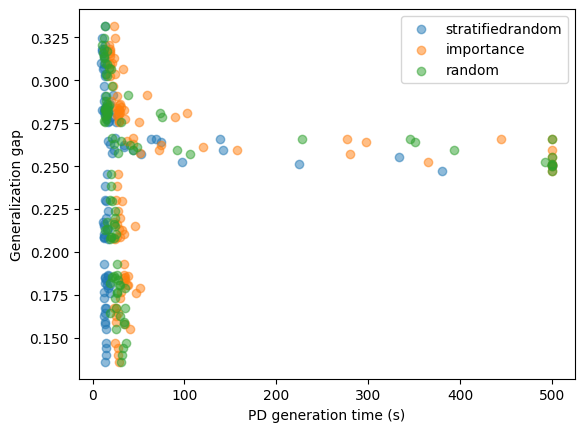

In [2]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np

gen_gaps = nb_utils.gen_gaps
samplers = []
times = np.zeros((len(gen_gaps), 0))
model_names = list(gen_gaps.keys())
gaps = list(gen_gaps.values())
for dir in nb_utils.dirs(nb_utils.outdir / 'task1'):
	samplers += [dir.name]
	log = dir.joinpath('std_log.txt').read_text()
	data = {
		match.group(1): float(match.group(2))
		for match in re.finditer(r'(model_\d+)/pds: ([\d\.]+)', log)
	}
	times = np.c_[times, [data[m] for m in model_names]]
plt.title('')
for x in times.T:
	plt.scatter(x, gaps, alpha=0.5)
plt.legend(samplers)
plt.xlabel('PD generation time (s)')
plt.ylabel('Generalization gap')
plt.show()

In [3]:
import pandas as pd

ix = (times > 200).any(axis=1)
table = pd.DataFrame(
	data=dict(zip(samplers, times[ix].T)),
	index=np.array(model_names)[ix]
).replace()
table[table >= 500] = 'X'
table


,stratifiedrandom,importance,random
model_28,224.34377,X,X
model_29,379.908232,X,X
model_30,74.045154,297.679627,351.288313
model_31,53.225494,280.549644,106.231395
model_92,69.250672,444.203789,345.237939
model_93,96.808836,365.116832,491.98472
model_156,X,X,X
model_157,X,X,X
model_158,141.63678,X,392.706989
model_159,63.265419,276.78135,228.238523


In [4]:
data = [
	{'sampler': sampler, 'time': times[ix_model, ix_samp], 'gap': gaps[ix_model], 'model': model}
	for ix_samp, sampler in enumerate(samplers)
	for ix_model, model in enumerate(model_names)
]

single = alt.selection_single(on='mouseover', nearest=True, fields=['model'])
alt.Chart(alt.Data(values=data)).mark_circle(size=50).encode(
	alt.Y('time:Q', scale=alt.Scale(domainMax=500)),
	alt.X('gap:Q', scale=alt.Scale(zero=False)),
	tooltip='model:N',
	color='sampler:N',
	opacity=alt.condition(single, alt.value(1), alt.value(0.2))
	# size=alt.condition(single, alt.value(130), alt.value(30)),
	# stroke=alt.condition(single, alt.value('black'), alt.value('white'))
).add_selection(
	single
)

alt.Chart(...)